In [1]:
from fastai.tabular.all import *
import pandas as pd
import numpy as np
import pickle

In [2]:
with open(f"cache/training_data.pickle", 'rb') as f:
    data = pickle.load(f)
columns_output = list(map(str, list(data['limits'])))
degrees = data['degrees']
lengths = data['lengths']
degree_length_inputs = []
for degree in degrees:
    for length in lengths:
        degree_length_inputs.append(f"{degree}-{length}")

In [3]:
input_symbols = np.array(data['input_symbols'])
input_symbols_unique = set(data['input_symbols'])
data_input = pd.DataFrame(data=data['input'].transpose(), columns=degree_length_inputs)
#data_input['symbol'] = data['input_symbols']
#data_input['symbol'] = data_input['symbol'].astype('|S')
for symbol in input_symbols_unique:
    data_input[symbol] = np.where(input_symbols == symbol, True, False)

In [4]:
len(input_symbols_unique), input_symbols_unique

(19,
 {'ADAUSDT',
  'BCHUSDT',
  'BNBUSDT',
  'BTCUSDT',
  'BTTUSDT',
  'CHZUSDT',
  'DOGEUSDT',
  'EOSUSDT',
  'ETCUSDT',
  'ETHUSDT',
  'LINKUSDT',
  'LTCUSDT',
  'MATICUSDT',
  'NEOUSDT',
  'THETAUSDT',
  'TRXUSDT',
  'VETUSDT',
  'XLMUSDT',
  'XRPUSDT'})

In [5]:
data_output = pd.DataFrame(data=data['output'].transpose(), columns=columns_output)

In [6]:
df = pd.concat((data_input, data_output.reindex(data_input.index)), axis=1)
df.columns = list(map(str, list(df.columns)))
del data_input
del data_output

In [7]:
cont_names = degree_length_inputs
cat_names = list(input_symbols_unique)
y_names = list(map(str, list(data['limits'])))

In [8]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [9]:
to = TabularPandas(df, procs=[Categorify], cat_names=cat_names, cont_names=cont_names, y_names=y_names, splits=splits)

In [10]:
dls = to.dataloaders(bs=2**17)

In [13]:
learn = tabular_learner(dls, lr=0.02, metrics=rmse)

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.02290867641568184)

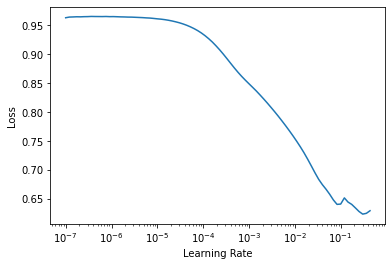

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,_rmse,time
0,0.398653,0.249890,0.499890,01:18
1,0.261751,0.232022,0.481687,01:19
2,0.236114,0.229882,0.479460,01:19
3,0.229815,0.231656,0.481306,01:20
4,0.227591,0.225942,0.475334,01:17
5,0.224722,0.225574,0.474947,01:18
6,0.222356,0.221622,0.470767,01:18
7,0.220502,0.215852,0.464599,01:17
8,0.217780,0.220503,0.469578,01:17
9,0.214722,0.209723,0.457955,01:18


In [16]:
learn.show_results(max_n=50)

,BNBUSDT,BTTUSDT,LINKUSDT,ADAUSDT,CHZUSDT,BCHUSDT,NEOUSDT,LTCUSDT,THETAUSDT,BTCUSDT,DOGEUSDT,ETCUSDT,ETHUSDT,XLMUSDT,TRXUSDT,EOSUSDT,VETUSDT,XRPUSDT,MATICUSDT,1-5,1-7,1-11,1-15,1-22,1-33,1-47,1-68,1-100,2-5,2-7,2-11,2-15,2-22,2-33,2-47,2-68,2-100,3-5,3-7,3-11,3-15,3-22,3-33,3-47,3-68,3-100,"(1.03, 0.93)","(1.04, 0.94)","(1.05, 0.95)","(1.06, 0.96)","(1.07, 0.97)","(1.03, 0.93)_pred","(1.04, 0.94)_pred","(1.05, 0.95)_pred","(1.06, 0.96)_pred","(1.07, 0.97)_pred"
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.001141,0.001284,0.002741,0.002253,0.001015,0.000827,0.000646,0.000219,0.000059,0.009316,0.002868,0.000546,0.003225,0.004222,0.001862,0.001585,0.001337,0.000794,0.010377,0.010717,0.002308,-0.000747,0.002732,0.004215,0.001804,0.002280,1.419800e-03,1.0,1.0,1.0,1.0,1.0,0.845131,0.827349,0.806784,0.763629,0.669774
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.003665,-0.004021,-0.000096,0.001866,0.001756,0.000923,0.000353,0.000257,0.000456,-0.007984,-0.004579,-0.007550,-0.004983,0.000786,0.002881,0.002184,0.000725,0.000389,-0.002504,-0.006856,-0.006408,-0.009284,-0.007184,-0.000797,0.002819,0.003233,2.485723e-04,1.0,1.0,1.0,1.0,1.0,0.751323,0.675461,0.601515,0.514961,0.410797
2,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.001760,0.000859,0.000535,0.001166,0.001420,0.000569,-0.000267,-0.000631,-0.000142,-0.000530,0.000896,0.001538,-0.000225,0.001047,0.002322,0.002262,0.000313,-0.000537,0.002151,0.002026,0.000753,0.002353,-0.001194,0.001126,0.002367,0.004471,-6.578356e-04,1.0,1.0,1.0,1.0,1.0,0.787275,0.738403,0.685675,0.610738,0.513946
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.000545,-0.000162,0.001052,0.001325,0.001575,-0.000557,-0.001538,-0.001721,-0.001148,-0.008280,-0.000180,-0.002190,-0.000425,0.001050,0.005148,0.001925,-0.000835,-0.002455,-0.010434,-0.011025,-0.001045,-0.002495,-0.002148,-0.000910,0.006160,0.004214,6.920282e-05,1.0,1.0,1.0,1.0,1.0,1.004920,0.962136,0.902080,0.826412,0.705645
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.000580,0.000659,0.002066,0.001995,0.000149,-0.000283,0.000311,0.000462,0.000104,-0.001104,-0.002199,-0.000804,0.001039,0.004796,0.000490,-0.001094,-0.000012,0.000915,0.000210,-0.000499,-0.003239,-0.001489,-0.000446,0.007159,0.002224,-0.001555,-4.356900e-04,0.0,0.0,0.0,0.0,0.0,0.562336,0.461497,0.410775,0.356293,0.314672
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.005678,0.004618,0.002202,0.001205,-0.000270,-0.001348,-0.001480,-0.001189,-0.000925,0.002586,0.005330,0.006603,0.004944,0.004460,0.001493,-0.000562,-0.001551,-0.001584,0.003678,0.003725,0.006834,0.007458,0.004672,0.006317,0.003297,-0.000073,-1.484803e-03,0.0,0.0,0.0,0.0,0.0,0.442667,0.302153,0.216214,0.181197,0.146330
6,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.002397,-0.001891,-0.004719,-0.003305,-0.003057,-0.002643,-0.002066,-0.001145,-0.000642,0.005079,0.007508,0.000465,-0.005299,-0.004412,-0.003223,-0.004194,-0.003897,-0.002606,-0.001666,0.003888,0.009938,0.004225,-0.002871,-0.005758,-0.002286,-0.004515,-4.201075e-03,1.0,1.0,0.0,0.0,0.0,0.842023,0.796854,0.727149,0.622963,0.507994
7,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.002619,0.001934,0.001297,0.001771,0.001008,0.000320,-0.000393,-0.000538,-0.000273,0.006411,0.005150,0.003103,0.001124,0.002507,0.002396,0.001630,-0.000082,-0.000485,0.012099,0.006495,0.004651,0.003897,0.001996,0.002132,0.003383,0.003440,-4.019987e-04,1.0,1.0,1.0,1.0,1.0,1.177475,1.272603,1.329644,1.322171,1.200703
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,-0.002673,-0.001345,0.000501,0.000726,0.000940,0.000409,0.000110,0.000509,-0.000075,-0.004132,-0.003275,-0.003137,-0.001040,0.000458,0.001767,0.000830,0.000247,0.001048,-0.005711,-0.006677,-0.004984,-0.004145,-0.002538,-0.000168,0.002766,-0.000511,

In [17]:
learn.export('model_all_2021-06-23.pickle')